<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-project/blob/main/DecisionTree10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DECISION TREE CLASSIFIER WITH HYPERPARAMETERS

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data["target"]=iris.target
data.columns = data.columns.str.capitalize()
data.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.isna().sum()

Sepal length (cm)    0
Sepal width (cm)     0
Petal length (cm)    0
Petal width (cm)     0
Target               0
dtype: int64

In [4]:
data["Target"].unique()

array([0, 1, 2])

In [5]:
input = data.drop("Target",axis=1)
output = data['Target']

In [10]:
from sklearn.model_selection import train_test_split
input_train , input_test , output_train , output_test = train_test_split(input,output,test_size =0.2,random_state =45, stratify= data["Target"])

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="gini",min_samples_split=4,max_depth = 5)
dtc.fit(input_train,output_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [44]:
y_pred_train = dtc.predict(input_train)
y_pred_test = dtc.predict(input_test)

In [45]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(output_train,y_pred_train))
print("TEST\n")
print(classification_report(output_test,y_pred_test))

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.97      0.99        40
           2       0.98      1.00      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

TEST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



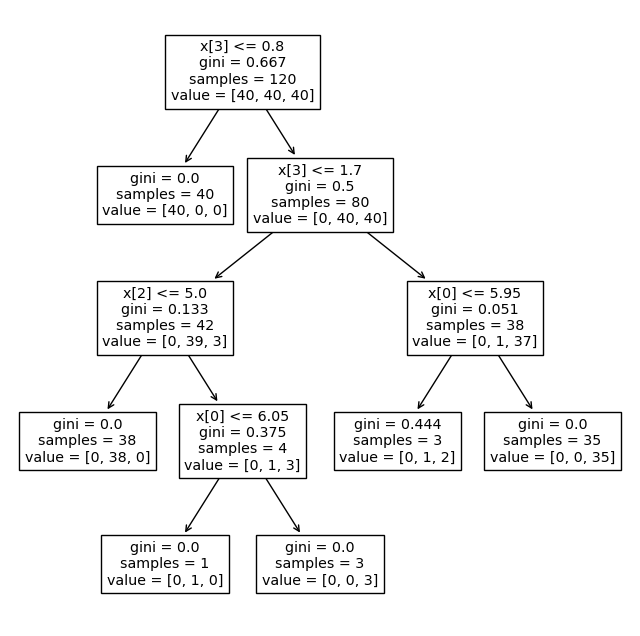

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=[8,8])
plot_tree(dtc)
plt.show()